<a href="https://colab.research.google.com/github/ABED00RICK/adding-noise-python-manytypes/blob/main/Noise_Adding_Many_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Noise** #


Noise is any distortion that occurs on the digital image and may damage the contents of the image, so removing the noise is necessary until the image becomes closer to the real image, so the noise that occurs in the images is a serious problem, noise is emerged by any interference into the data via any electrical system used for storage, transmission, and processing and noise could exist due to the quantum factors .

In imaging and medical imaging, we challenged with different types of noises, and there are many reduction methods used , one of the main methods is to use digital filters, where the effect of the efficacy of these filters can be measured by noticing the change in SNR and PSNR values

In order to study the efficacy of different types of filters, we need to be able to add noise to a pure image. Therefore we then can apply the wanted filter and study the results 

Via python libraries, we would be able to add different types of noise to any image. 


## Applying Noise

# Poisson Noise

This type of noise occurs in the lighter parts of the image due to statistical 
Fluctuations, noise occurs in different pixels and it’s span on each pixel is independent, Poisson noise is also called shot noise or photon noise. Therefore, it does not differ significantly from the Gaussian noise.

Speckle noise have a grainy form similar to Salt and Pepper noise, usually it appears in radar and ultras sound images. 




For some types of noise, we will use Python  `noise()` function in `Wand`, where it includes gaussian, impulse, Laplacian, Poisson.

Wand is a ctypes-based simple ImageMagick binding for Python, first we install the library on collab as following :  

In [ ]:
!sudo apt install imagemagick
!pip install wand


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono g

Now we are able to import `wand` library

In [ ]:
import wand

To be able to deal with images on python using the wand library, we will import the object `Image`

In [ ]:
from wand.image import Image


Then we can Read our image using `Image()` function , Next,we Generate noised image using spread() function, for example we will use the `noise()` function to add Poisson noise to our "sample" image .

The `noise()` function is an inbuilt function in the Python Wand ImageMagick library which is used to add noise to the image.


*Syntax :*
```
 noise(noise_type, attenuate, channel)

```


*Parameters:*

 This function accepts three parameters as mentioned above and defined below: 

**noise_type:** This parameter is used to store the noise type. Some of the available noise types are ‘undefined’, ‘uniform’, ‘gaussian’, ‘multiplicative_gaussian’, ‘impulse’, ‘laplacian’, ‘poisson’, ‘random’.

**attenuate:** This parameter stores the rate of distribution.

**channel:** This parameter stores the channel type as “green”, “yellow”, “red” etc.
Return Value: This function returns the Wand ImageMagick object.




In [ ]:
with Image(filename ="/content/Hand.jpeg") as img:

	# Generate noise image using spread() function
	img.noise("poisson", attenuate = 1.0)
	img.save(filename ="hand-poisson-noise.jpeg")
 


After we added Poisson noise to our image, we shall make sure it stays in grayscale format by using `transform_colorspace()` function as shown : 

In [ ]:
with Image(filename ="hand-poisson-noise.jpeg") as ims:
    ims.transform_colorspace('gray')
    ims.save(filename="hand-poisson-noise-gray.jpeg")

Finally, we display the final image by using `cv2_imshow` function, which we can import from `google.colab.patches`

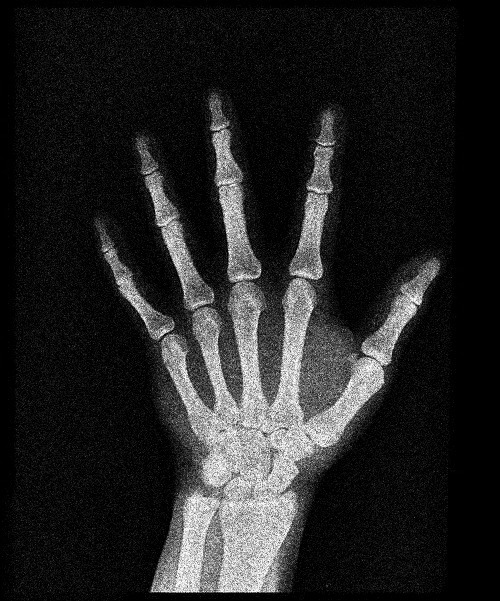

In [ ]:
from google.colab.patches import cv2_imshow
from cv2 import imread

final = imread("hand-poisson-noise-gray.jpeg")
cv2_imshow(final)

## Gaussian Noise

Gaussian noise is a kind of statistical noise. It's considered to be an essential part of reading image sensor noise. The probability density function for Gaussian noise is equal to the normal distribution function, also known as the Gaussian distribution. which has a bell-shaped probability distribution function .

To apply the gaussian noise to an image, we shall repeat the previous steps.

In [ ]:
with Image(filename ="/content/Hand.jpeg") as img:

	# Generate noise image using spread() function
	img.noise("gaussian", attenuate = 1.0)
	img.save(filename ="hand-gaussian-noise.jpeg")

Again, we make sure that the resultant images stay in grays scale format by applying the `transform_colorspace()` function

In [ ]:
with Image(filename ="hand-gaussian-noise.jpeg") as ims:
    ims.transform_colorspace('gray')
    ims.save(filename="hand-gaussian-noise-gray.jpeg")

Finally we display the final image using `cv2_imshow` function : 

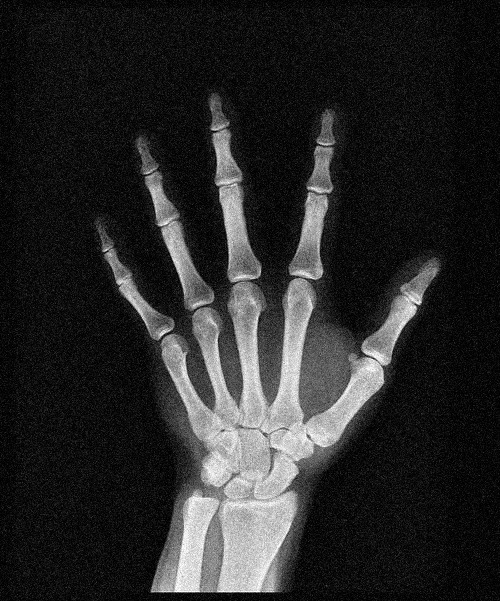

In [ ]:
final = imread("hand-gaussian-noise-gray.jpeg")
cv2_imshow(final)

# Salt & Pepper Noise

The image with salt and pepper noise will contain dark pixels in bright areas and bright pixels in dark areas, This type of noise is an impulse, which is also called intensity spikes, which occurs due to data transmission errors.  


Applying S&P noise in python requires two important libraries, OpenCV for reading and extracting image files, and `random` for creating an S&P noise-adding function. 

	


First step, is to define salt&pepper noise adding function, that will be applied on images .


    def s&p_noise(img): 


 building S&P noise-adding function requires an array of random x,y values, Also that array should take the shape and size of the image that we want to add noise on. 

    row , col = img.shape

Next, we use the function `randint` from `random` libary.

***random.randint(a, b) :***
Return a random integer N such that $\ $ a $\le$ N  $\le$  b.   Alias for randrange $\ $(a, b+1).

Therefore, we will set the randiant range betwen 300 $\sim$ 10000 values . 


    number_of_pixels = random.randint(300 , 10000)



Next, we start a loop that include all the random values that we generated previously .


	for i in range(number_of_pixels):

Basically, salt and pepper noise will be established by converting the random generated pixels into black/white pixels (255,0).Therefore we must pick random pixels from row/col array, and they will be called x-coord, y-coord using the function `randiant` function, we will set the range of randint function between $0$ $\sim$ ($col$/ $row$) $- $1 ,python uses 0-based indexing. So for example if the image is 10x10 pixels, you need to choose coordinates in the range 0-9, rather than 1-10:


    y_coord=random.randint(0, row - 1)
	x_coord=random.randint(0, col - 1)

then we convert these random values into white pixels, and white pixels values is 255, that will be performed by this command :

        img[y_coord][x_coord] = 255

repeating same steps with same random pixels values range, but we set the random pixels of x,y to be 0 this time, or black .

		img[y_coord][x_coord] = 0

S&P noise will emerge by repeating all the previous under the loop :
     
    range(number_of_pixels)

***Note:*** that the attenuation of S&P noise can be controlled by setting up the range of `number_of_pixels`

In [ ]:

import random
import cv2

def add_noise(img):

	# Getting the dimensions of the image
	row , col = img.shape
	
	# Randomly pick some pixels in the
	# image for coloring them white
	# Pick a random number between 300 and 10000
	number_of_pixels = random.randint(300, 10000 )
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to white
		img[y_coord][x_coord] = 255
		
	# Randomly pick some pixels in
	# the image for coloring them black
	# Pick a random number between 300 and 10000
	number_of_pixels = random.randint(300 , 10000)
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to black
		img[y_coord][x_coord] = 0
		
	return img

# salt-and-pepper noise can
# be applied only to grayscale images
# Reading the color image in grayscale image
img = cv2.imread('/content/Hand.jpeg',
				cv2.IMREAD_GRAYSCALE)

#Storing the image
cv2.imwrite('s&p12spe.jpg',	add_noise(img))



True

The `add_noise()` function that we created will implemented by using `cv2.imwrite() function` 

finally we display our final noised image :

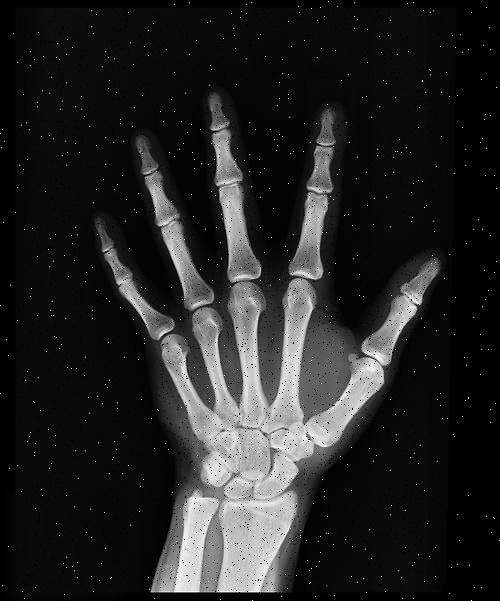

In [ ]:
final = imread("s&p12spe.jpg")
cv2_imshow(final)

## Speckle Noise 

This type of noise is a double noise because the random interference between obstacles is coherent. Therefore, it’s usually occurring in imaging systems. It follows the gamma distribution 

First step, is to define our Speckle noise adding function, that will be applied on images .


    def speckle_noise(img): 


within the function, we define a parameter called gauss, and it will store values in an array that takes the size of the input image, these values will follow the normal distribution, this will be done in two steps. 



in the first step, we introduce the gamma distribution in python via the `np.random.gamma` function.


    random.gamma(shape, scale=1.0, size=None)






**Parameters:** 


**shape:** float or array_like of floats
The shape of the gamma distribution. Must be non-negative.



**scale:** float or array_like of floats, optional
The scale of the gamma distribution. Must be non-negative. Default is equal to 1.



**size:** int or tuple of ints, optional
Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if shape and scale are both scalars. Otherwise, np.broadcast(shape, scale).size samples are drawn.



**Returns:**
outndarray or scalar
Drawn samples from the parameterized gamma distribution.

now, the gauss parameter will take the gamma values by sitting shape, scale values to be 1, and the size to be the pixel number of the imputed image.

    gauss = np.random.gamma(1,1,img.size)


in the second step, we will reshape the gamma values array, to take the inputted image array shape, Therefore we can add it to the original image independently.


    gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')

`img.shape[0][1][2]` relates to : 

    height = img.shape[0]
    width = img.shape[1]
    pixel channels = img.shape[2]

finally, we get the corrupted with speckle `noise` by defining noise, to be the original image combined with the gauss array



    noise = img + img * gauss 

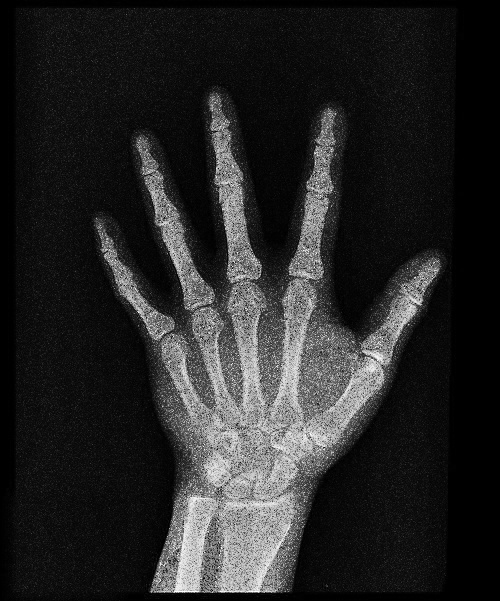

In [ ]:
import cv2 
import numpy as np

def add_speckle(img):
  
  gauss = np.random.gamma(1,1,img.size)
  gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
  noise = img + img * gauss 


  return noise

img = cv2.imread('/content/Hand.jpeg')

#Storing the image
cv2.imwrite('speckle5.jpg',	add_speckle(img))


with Image(filename ="speckle5.jpg") as ims:
    ims.transform_colorspace('gray')
    ims.save(filename="speckle_final.jpeg")

    final = imread("speckle_final.jpeg")
cv2_imshow(final)